In [35]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import seaborn as sn

env = gym.make("CartPole-v0")
print("Setup complete")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Setup complete


Number of resets: 47
Average Rewards per epoch: 21.23404255319149
Observations


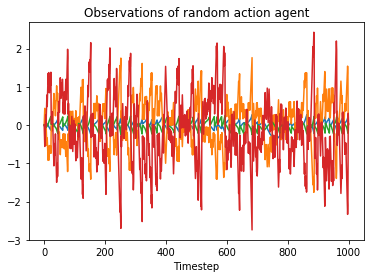

Rewards


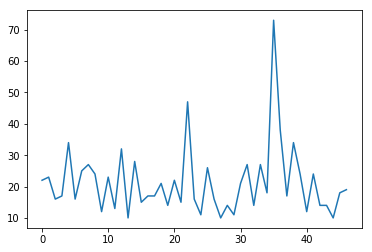

In [4]:
#random baseline
o = env.reset()
os = [np.array([0,0,0,0])]
rewards = []
rewards_per_run = []
num_resets = 0



for i in range(1000):
    a = env.action_space.sample()
    #a = 1
    o, r, done, info = env.step(a)
    os.append(np.array(o))
    rewards.append(r)
    env.render()
    if done:
        rewards_per_run.append(np.sum(rewards))
        rewards = []
        num_resets +=1
        env.reset()
n = range(1001)
print("Number of resets: " + str(num_resets))
print("Average Rewards per epoch: " + str(np.mean(np.array(rewards_per_run))))
print("Observations")
fig = plt.figure()
plt.title("Observations of random action agent")
plt.xlabel("Timestep")
plt.plot(n,os)
plt.show()
print("Rewards")
plt.plot(rewards_per_run)
plt.show()


In [24]:
# the random baseline run over 50 runs
tot_r = []

resets = []
print(rewards)
for j in range(50):
    print(j)
    env.reset()
    num_resets = 0
    for i in range(1000):
        rewards = []
        a = env.action_space.sample()
        #a = 1
        o, r, done, info = env.step(a)
        os.append(np.array(o))
        rewards.append(r)
        env.render()
        if done:
            rewards_per_run.append(np.sum(rewards))
            rewards = []
            num_resets +=1
            env.reset()
    
    resets.append(num_resets)
    mean_reward = np.mean(rewards_per_run)
    print(mean_reward)
    tot_r.append(mean_reward)
    print(rewards)

print(tot_r)
print(resets)
np.save("CartPole_results/random_rewards", np.array(tot_r))
np.save("CartPole_results/random_resets", np.array(resets))
print("Done!")

[1.0]
0
16.690944826808856
[1.0]
1
15.621107679526434
[1.0]
2
14.687845487216237
[1.0]
3
13.866574757983262
[1.0]
4
13.210272605440819
[1.0]
5
12.578469973438256
[1.0]
6
11.997072442720738
[1.0]
7
11.492619578375749
[1.0]
8
11.061837542899912
[1.0]
9
10.61986897793141
[1.0]
10
10.190410541416616
[1.0]
11
9.82027404146239
[1.0]
12
9.506826286269925
[1.0]
13
9.175742499115655
[1.0]
14
8.875485697311866
[1.0]
15
8.568573387048978
[1.0]
16
8.289844055514596
[1.0]
17
8.09390751646217
[1.0]
18
7.8484762517542315
[1.0]
19
7.666619045587183
[1.0]
20
7.473748305903528
[1.0]
21
7.2994246061117565
[1.0]
22
7.134243031219672
[]
23
6.98097606414097
[1.0]
24
6.831875244411677
[1.0]
25
6.668094607041085
[1.0]
26
6.539967603006787
[1.0]
27
6.406123847892127
[1.0]
28
6.286728200506733
[1.0]
29
6.177696079671333
[]
30
6.058112926971307
[1.0]
31
5.948682599224331
[1.0]
32
5.848450214972496
[1.0]
33
5.754392520270952
[1.0]
34
5.6554770720880185
[1.0]
35
5.558573873510456
[1.0]
36
5.471442140046312
[1.0]
3

In [12]:
# reflex agent baseline
actions = []
a = 0
env.reset()
os = []
rewards = []
rewards_per_run = []
num_resets = 0

for i in range(1000):
    o, r, done, info = env.step(a)
    os.append(np.array(o))
    rewards.append(r)
    if o[2] <=0:
        a = 0
    else:
        a = 1
    actions.append(a)
    env.render()
    if done:
        rewards_per_run.append(np.sum(rewards))
        rewards = []
        num_resets +=1
        env.reset()
n = range(1001)
print("Number of resets: " + str(num_resets))
print("Average Rewards per epoch: " + str(np.mean(np.array(rewards_per_run))))
print("Observations")
plt.plot(range(1000),os)
plt.show()
print("Rewards")
plt.plot(rewards_per_run)
plt.show()
print("Actions")
plt.plot(actions)
plt.show()

KeyboardInterrupt: 

In [25]:

tot_r = []
resets = []
for j in range(50):
    print(j)
    env.reset()
    actions = []
    a = 0
    env.reset()
    os = []
    rewards = []
    rewards_per_run = []
    num_resets = 0

    for i in range(1000):
        o, r, done, info = env.step(a)
        os.append(np.array(o))
        rewards.append(r)
        if o[2] <=0:
            a = 0
        else:
            a = 1
        actions.append(a)
        env.render()
        if done:
            rewards_per_run.append(np.sum(rewards))
            rewards = []
            num_resets +=1
            env.reset()
    tot_r.append(np.mean(np.array(rewards_per_run)))
    resets.append(num_resets)

np.save("CartPole_results/naive_control_rewards.npy", np.array(tot_r))
np.save("CartPole_results/naive_control_resets.npy", np.array(resets))
print("DONE!")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
DONE!


In [3]:

import gym
env = gym.make("CartPole-v0")
print("Done")


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Done


In [21]:
env.reset()
for i in range(1000):
    bleqh = env.step(1)
    img = env.render(mode='rgb_array')
    if bleqh[2]:
        env.reset()
    print(img.shape)
    

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 

KeyboardInterrupt: 

In [20]:
env.reset()
img = env.render(mode='rgb_array') 
print(img)
#img = env.render(mode='rgb_array') 
#print(img.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [26]:
# play environment yourself
import gym
import gym.utils as utils
print(gym)
import pkgutil
#help(gym)
help(gym.utils)
help(gym.utils.play)

<module 'gym' from '/home/beren/anaconda3/lib/python3.6/site-packages/gym/__init__.py'>
Help on package gym.utils in gym:

NAME
    gym.utils

DESCRIPTION
    A set of common utilities used within the environments. These are
    not intended as API functions, and will not remain stable over time.

PACKAGE CONTENTS
    atomic_write
    closer
    colorize
    ezpickle
    json_utils
    play
    reraise
    reraise_impl_py2
    reraise_impl_py3
    seeding

FILE
    /home/beren/anaconda3/lib/python3.6/site-packages/gym/utils/__init__.py




AttributeError: module 'gym.utils' has no attribute 'play'

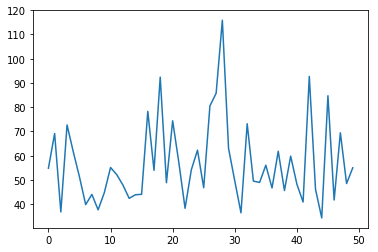

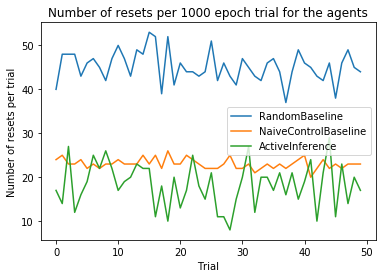

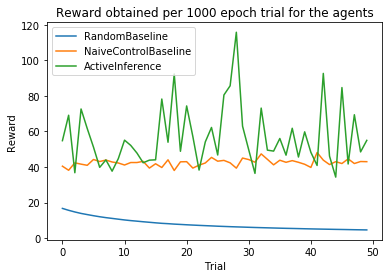

7.849392250563352
42.4956491479535
56.7722845061143


In [32]:
# load the results and test:
rand = np.load("CartPole_results/random_rewards.npy")
naive = np.load("CartPole_results/naive_control_rewards.npy")
active = np.load("CartPole_results/AI_rewards.npy")

randN = np.load("CartPole_results/random_resets.npy")
naiveN = np.load("CartPole_results/naive_control_resets.npy")
activeN = np.load("CartPole_results/AI_resets.npy")

plt.plot(active)
plt.show()



fig = plt.figure()
plt.plot(randN, label="RandomBaseline")
plt.plot(naiveN, label="NaiveControlBaseline")
plt.plot(activeN, label="ActiveInference")
plt.xlabel("Trial")
plt.ylabel("Number of resets per trial")
plt.title("Number of resets per 1000 epoch trial for the agents")
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(rand, label="RandomBaseline")
plt.plot(naive, label="NaiveControlBaseline")
plt.plot(active, label="ActiveInference")
plt.xlabel("Trial")
plt.ylabel("Reward")
plt.title("Reward obtained per 1000 epoch trial for the agents")
plt.legend()
plt.show()

rand_mu = np.mean(rand)
naive_mu = np.mean(naive)
active_mu = np.mean(active)

print(rand_mu)
print(naive_mu)
print(active_mu)


In [39]:
# t-test to test the actual statistical validity of these being better
import scipy.stats

print(np.mean(active) - np.mean(naive))
print(np.mean(active) - np.mean(rand))
print(np.mean(naive) - np.mean(rand))

print(scipy.stats.ttest_ind(naive, active, equal_var=False))
print(scipy.stats.ttest_ind(naive, active, equal_var=True))
print(scipy.stats.ttest_ind(rand, active, equal_var=True))
print(scipy.stats.ttest_ind(rand, naive, equal_var=True))

14.276635358160803
48.92289225555095
34.646256897390145
Ttest_indResult(statistic=-5.813814850204006, pvalue=4.172809586296906e-07)
Ttest_indResult(statistic=-5.813814850204006, pvalue=7.639484141768655e-08)
Ttest_indResult(statistic=-19.728009254339273, pvalue=6.692184723182537e-36)
Ttest_indResult(statistic=-65.4143647041111, pvalue=1.1541801632829036e-82)


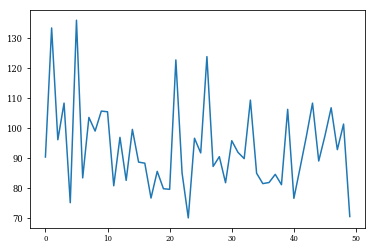

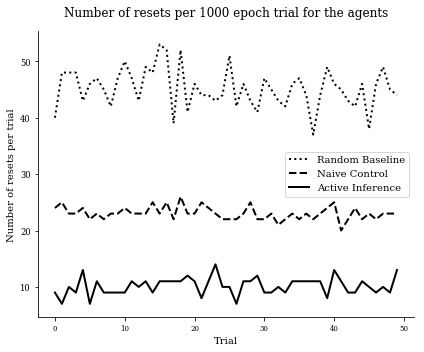

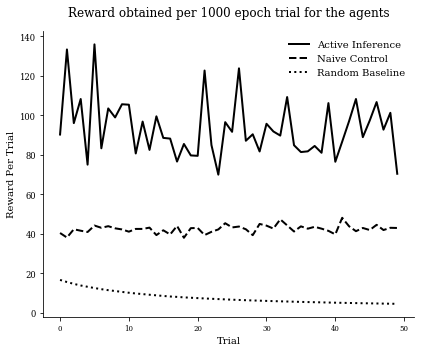

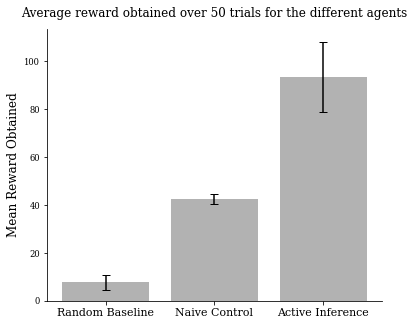

In [34]:

rand = np.load("CartPole_results/random_rewards.npy")
naive = np.load("CartPole_results/naive_control_rewards.npy")
active = np.load("CartPole_results/best_init_rewards_2.npy")

randN = np.load("CartPole_results/random_resets.npy")
naiveN = np.load("CartPole_results/naive_control_resets.npy")
activeN = np.load("CartPole_results/best_init_resets_2.npy")

plt.plot(active)
plt.show()

plt.rc("font", family="serif")
plt.rc("xtick", labelsize="x-small")
plt.rc("ytick", labelsize="small")
#plt.style.use(['fivethirtyeight'])



fig = plt.figure(figsize=(6,5))
plt.plot(randN, color="k", label="Random Baseline", ls= ':', linewidth=2)
plt.plot(naiveN,color="k", label="Naive Control", ls='--', linewidth=2)
plt.plot(activeN,color="k", label="Active Inference", ls='-',linewidth=2)
plt.xlabel("Trial",fontsize=10)
plt.ylabel("Number of resets per trial",fontsize=10)
plt.title("Number of resets per 1000 epoch trial for the agents",fontsize=12,pad=15)
plt.legend()
sn.despine(top=True, left=False, right=True, bottom=False)
plt.tight_layout()
plt.show()
fig.savefig("CartPole_results/proper_resets_plot.pdf", format="pdf", dpi=5000)

fig = plt.figure(figsize=(6,5))
plt.plot(active, color="k", label="Active Inference", ls='-',linewidth=2)
plt.plot(naive,color="k", label="Naive Control", ls='--',linewidth=2)
plt.plot(rand, color="k", label="Random Baseline", ls=':',linewidth=2)
plt.xlabel("Trial", fontsize=10)
plt.ylabel("Reward Per Trial", fontsize=10)
plt.title("Reward obtained per 1000 epoch trial for the agents", fontsize=12, pad =15)
plt.legend(frameon=False, loc='upper right')
sn.despine(top=True, left=False, right=True, bottom=False)
plt.tight_layout()
plt.show()
fig.savefig("CartPole_results/proper_rewards_plot.pdf", format="pdf", dpi=5000)

fig = plt.figure(figsize=(6,5))
means = [np.mean(rand), np.mean(naive), np.mean(active)]
stds = [np.std(rand), np.std(naive), np.std(active)]
labels=['Random Baseline', 'Naive Control', 'Active Inference']
x = [1,2,3]
plt.bar(x,means, color='k', yerr=stds, alpha=0.3,capsize=4,linewidth=2)
plt.xticks(x,labels,fontsize=11)
#plt.xlabel('Agent',fontsize=10)
plt.ylabel('Mean Reward Obtained',fontsize=12)
plt.title("Average reward obtained over 50 trials for the different agents",fontsize=12,pad=12)
sn.despine(top=True, left=False, right=True, bottom=False)
#plt.legend()
plt.show()
fig.savefig("CartPole_results/proper_agent_barchart.pdf", format="pdf", dpi=5000)

In [48]:
import scipy.stats
print(np.mean(active) - np.mean(naive))
print(np.mean(active) - np.mean(rand))
print(np.mean(naive) - np.mean(rand))

print("means:")
print("Active inference:", np.mean(active))
print("Naive:", np.mean(naive))
print("Random:", np.mean(rand))

print(scipy.stats.ttest_ind(naive, active, equal_var=False))
print(scipy.stats.ttest_ind(naive, active, equal_var=True))
print(scipy.stats.ttest_ind(rand, active, equal_var=True))
print(scipy.stats.ttest_ind(rand, naive, equal_var=True))

51.04558339727902
85.69184029466916
34.646256897390145
means:
Active inference: 93.54123254523252
Naive: 42.4956491479535
Random: 7.849392250563352
Ttest_indResult(statistic=-24.301869510551914, pvalue=1.2167807465155134e-29)
Ttest_indResult(statistic=-24.301869510551914, pvalue=2.806237596858719e-43)
Ttest_indResult(statistic=-40.25442320201156, pvalue=9.256916472272266e-63)
Ttest_indResult(statistic=-65.4143647041111, pvalue=1.1541801632829036e-82)


In [37]:
 o = env.reset()
os = [np.array([0,0,0,0])]
rewards = []
rewards_per_run = []
num_resets = 0



for i in range(1000):
    a = env.action_space.sample()
    #a = 1
    o, r, done, info = env.step(a)
    os.append(np.array(o))
    rewards.append(r)
    env.render()
    if done:
        rewards_per_run.append(np.sum(rewards))
        rewards = []
        num_resets +=1
        env.reset()

print("Done!")

Done!


<class 'numpy.ndarray'>
1001
(1001, 4)
Number of resets: 50
Average Rewards per epoch: 19.38
Observations


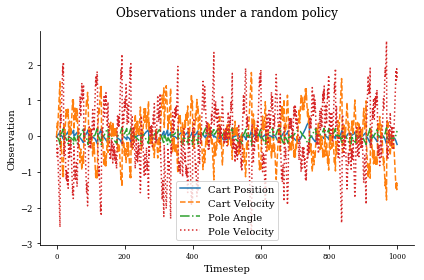

In [47]:
    #0	Cart Position             -4.8            4.8
    #    1	Cart Velocity             -Inf            Inf
     #   2	Pole Angle                 -24 deg        24 deg
     #   3	Pole Velocity At Tip      -Inf            Inf
    
print(type(os))
print(len(os))
print(np.array(os).shape)
os = np.array(os)
n = range(1001)
print("Number of resets: " + str(num_resets))
print("Average Rewards per epoch: " + str(np.mean(np.array(rewards_per_run))))
print("Observations")

fig = plt.figure()
plt.title("Observations under a random policy", fontsize=12, pad=15)
plt.xlabel("Timestep", fontsize=10)
plt.ylabel("Observation", fontsize=10)
plt.plot(n,os[:,0], label='Cart Position',  linestyle='-')
plt.plot(n, os[:,1], label='Cart Velocity' ,linestyle='--')
plt.plot(n,os[:,2], label='Pole Angle',  linestyle='-.')
plt.plot(n, os[:,3], label='Pole Velocity', linestyle=':')
plt.legend()
sn.despine(top=True, left=False, right=True, bottom=False)
plt.tight_layout()
fig.savefig("CartPole_results/random_policy_observations.pdf", format="pdf", dpi=5000)
plt.show()
#print("Rewards")
#plt.plot(rewards_per_run)
#plt.show()
